# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 1</center></span>

### Exercise 01.1  - test the pseudo number generator
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. <center>$\langle r \rangle = \int_0^1 r dr = 1/2$. </center>
    Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).

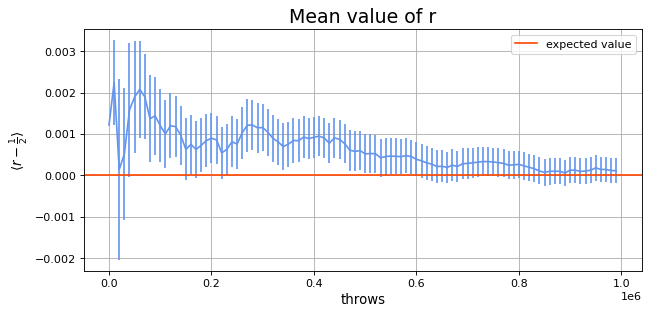

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

M=1000000              # Total number of throws
N=100                  # Number of blocks
L=int(M/N)             # Number of throws in each block

media, varianza = np.loadtxt("Data1_1", unpack=True, usecols=(0,1), delimiter=",")
x = np.arange(N)
x*=L

figure(figsize=(9,4), dpi=80)
plt.errorbar(x,media-0.5,yerr=varianza, color="cornflowerblue")
plt.xlabel('throws', fontsize = 12)
plt.ylabel(r'$\langle r-\frac{1}{2} \rangle$', fontsize = 12)
plt.title('Mean value of r', fontsize = 17)
plt.axhline(0, color ="orangered", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

Il grafico mostra l'evoluzione del valore medio di una variabile casuale $r$ estratta uniformemente tra 0 e 1 tramite un generatore congruenziale lineare.

Risulta evidente che all'aumentare del numero eventi il valor medio si avvicina sempre di più al valore atteso $0.5$, con il quale è compatibile considerando l'incertezza statistica.
L'incertezza statistica è stata calcolata con il metodo delle medie a blocchi: il numero di estrazioni totali è $10^6$, il numero dei blocchi è 100, cisascuno contenente $10^4$ stime (valore pari al numero delle estrazioni diviso il numero dei blocchi).

2. <center> $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. </center>
    Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

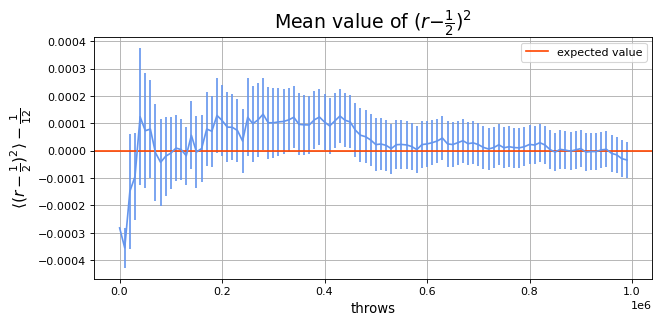

In [6]:
media, varianza = np.loadtxt("Data1_2", unpack=True, usecols=(0,1), delimiter=",")
x = np.arange(N)
x*=L

figure(figsize=(9,4), dpi=80)
plt.errorbar(x,media-1/12,yerr=varianza, color="cornflowerblue")
plt.xlabel('throws', fontsize = 12)
plt.ylabel(r'$\langle(r-\frac{1}{2})^2 \rangle -\frac{1}{12}$', fontsize = 14)
plt.title(r'Mean value of $(r−\frac{1}{2})^2$', fontsize = 17)
plt.axhline(0, color ="orangered", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

Il grafico mostra l'andamento della varianza di una variabile casuale $r$ estratta tra 0 e 1 tramite un generatore congruenziale lineare.

Risulta evidente dal grafico che, con l'aumentare del numero degli eventi, il valor medio della varianza tende al valore aspettato $1/12$, con il quale è compatibile. L'incertezza statistica è stata calcolata con il metodo delle medie a blocchi: il numero di estrazioni totali è $10^6$, il numero dei blocchi è 100, cisascuno contenente $10^4$ stime (valore pari al numero delle estrazioni diviso il numero dei blocchi).

3. The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

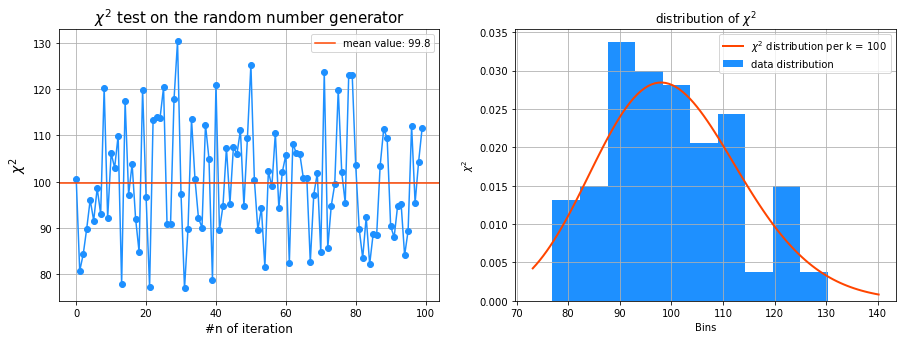

In [29]:
from scipy.stats import chi2

chisquared = np.loadtxt("Data1_3")
x = np.arange(100)
k = np.mean(chisquared)
x_chi = np.linspace(chi2.ppf(0.02,100), chi2.ppf(0.995, 100), 100)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,5))

ax0.plot(x,chisquared, c="dodgerblue", marker="o")
ax0.set_xlabel('#n of iteration', fontsize = 12)
ax0.set_ylabel('$χ^2$', fontsize = 14)
ax0.set_title(r"$χ^2$ test on the random number generator", fontsize = 15)
ax0.axhline(k, color ="orangered", linestyle="solid" , label="mean value: "+str(round(k, 2)))
ax0.legend()
ax0.grid(True)

ax1.hist(chisquared, density=True, label="data distribution", color="dodgerblue")
ax1.plot(x_chi, chi2.pdf(x_chi, 100), lw=2, label=r"$\chi^2$ distribution per k = 100", c="orangered")
ax1.set_xlabel('Bins')
ax1.set_ylabel("$\chi^2$")
ax1.set_title("distribution of $\chi^2$")
ax1.legend()
ax1.grid(True)

Il grafico riporta cento risultati del test statistico del $\chi^2$.

Ogni valore è stato calcolato estraendo $10^5$ numeri pseudo casuali. I valori oscillano attorno ad un valor medio compatibile con 100, il valore aspettato.<br>
Le oscillazioni sembrano molto ampie ma la varianza $\sigma^2$ aspettata in questa distribuzione è circa 100: come si osserva dal grafico, una deviazione standar $\sigma = 10$ include la maggior parte dei dati trovati.<br>
Inoltre, l'istogramma dei dati estratti ricalca la distribuzione del $\chi^2$ teorica.

### Exercise 01.2 - verify the Central Limit Theorem
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [11]:
from scipy.stats import norm, cauchy
uniform, exp, lorentz = np.loadtxt("Data2", unpack=True, usecols=(0,1,2), delimiter=",")
N = [1, 2, 10, 100]

unif1, unif2, unif10, unif100 = np.split(uniform, 4)
exp1, exp2, exp10, exp100 = np.split(exp, 4)
lor1, lor2, lor10, lor100 = np. split(lorentz, 4)

Parametri del fit: (mu, sigma)


(0.5000108001, 0.029037794697737294)

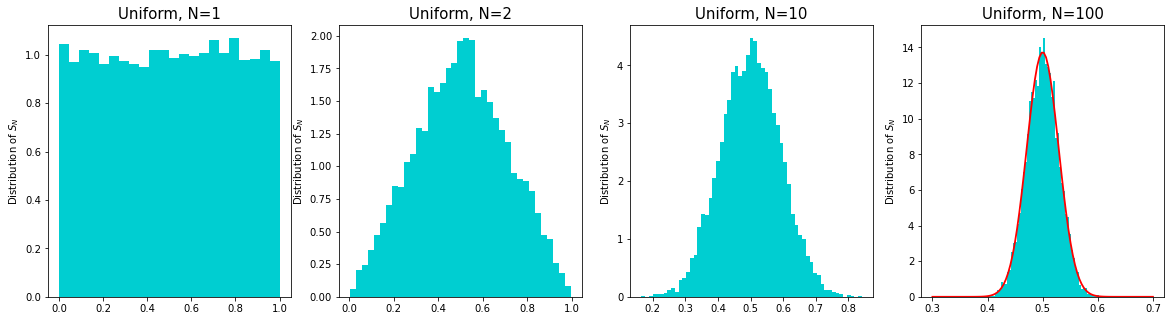

In [12]:
#plot uniform for N
fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize=(20,5))

ax0.hist(unif1, bins="auto", color="darkturquoise", density=True)
ax1.hist(unif2, bins="auto", color="darkturquoise", density=True)
ax2.hist(unif10, bins="auto", color="darkturquoise", density=True)
ax3.hist(unif100, bins="auto", color="darkturquoise", density=True)

#gaussian fitting
mu, std = norm.fit(unif100)
x = np.linspace(0.3, 0.7, 100)
p = norm.pdf(x, mu, std)
ax3.plot(x, p, color = "red", linewidth = 1.8, label="theoretical gaussian distribution")

for i in range(4):
    globals()['ax'+str(i)].set_title(f"Uniform, N={N[i]}", fontsize = 15)
    globals()['ax'+str(i)].set_ylabel(f"Distribution of $S_N$")
    
print(r"Parametri del fit: (mu, sigma)")
(mu, std)

Ogni grafico è stato ottenuto estraendo $10^5$ numeri casuali nell'intervallo (0 , 1). $N$ è il numero di estrazioni che vengono mediate per produrre un valore nel grafico.

Come previsto dal teorema del limite centrale una variabile aleatoria data dalla somma di N variabili indipendenti distribuite uniformemente ha una distribuzione che converge a quella gaussiana nel limite $N → \infty$

Parametri del fit: (mu, sigma)


(0.9998264965999999, 0.09851158906206817)

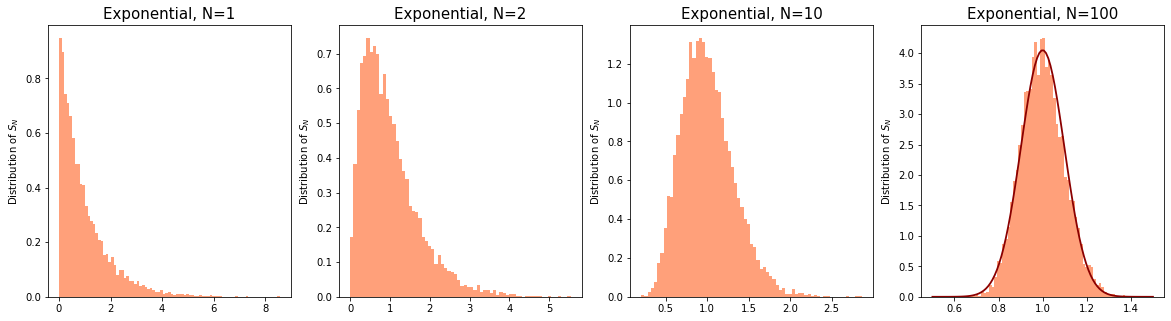

In [6]:
#plot exp for N
fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize=(20,5))

ax0.hist(exp1, bins="auto", color="lightsalmon", density=True)
ax1.hist(exp2, bins="auto", color="lightsalmon", density=True)
ax2.hist(exp10, bins="auto", color="lightsalmon", density=True)
ax3.hist(exp100, bins="auto", color="lightsalmon", density=True)

#gaussian fitting
mu, std = norm.fit(exp100)
x = np.linspace(0.5, 1.5, 100)
p = norm.pdf(x, mu, std)
ax3.plot(x, p, color = "darkred", linewidth = 1.8, label="theoretical gaussian distribution")

for i in range(4):
    globals()['ax'+str(i)].set_title(f"Exponential, N={N[i]}", fontsize = 15)
    globals()['ax'+str(i)].set_ylabel(f"Distribution of $S_N$")
    
print(r"Parametri del fit: (mu, sigma)")
(mu, std)

Ogni grafico è stato ottenuto estraendo $10^5$ numeri casuali nell'intervallo (0 , 1). $N$ è il numero di estrazioni che vengono mediate per produrre un valore nel grafico.


Di nuovo, è facile vedere la verifica del teorema del limite centrale: la somma di variabili aletorie distribuite esponenzialmente ha come bacino di convergenza una distribuzione normale.

Parametri del fit: (mu, sigma)


(-0.010155445369008923, 1.0041842049789673)

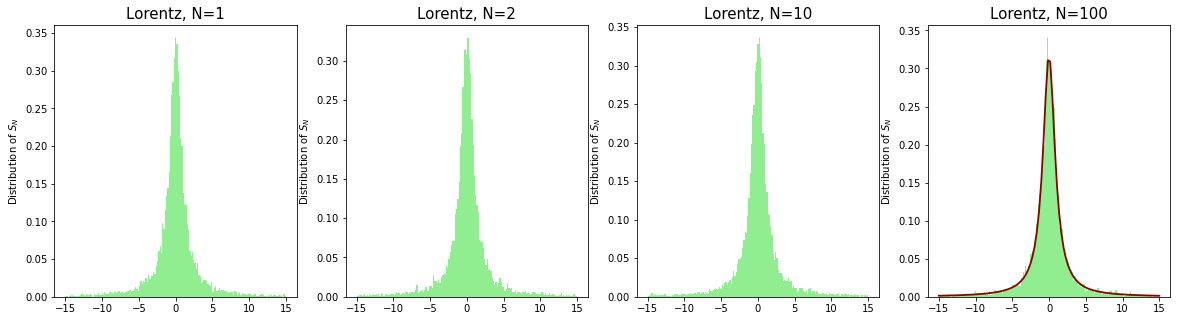

In [7]:
#plot lorentzian for N
fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize=(20,5))

ax0.hist(lor1, bins="auto", range=(-15, 15), color="lightgreen", density=True)
ax1.hist(lor2, bins="auto", range=(-15, 15), color="lightgreen", density=True)
ax2.hist(lor10, bins="auto", range=(-15, 15), color="lightgreen", density=True)
ax3.hist(lor100, bins="auto", range=(-15, 15), color="lightgreen", density=True)

#cauchy-lorentz fitting
mu, gamma = cauchy.fit(lor100)
x = np.linspace(-15, 15, 100)
p = cauchy.pdf(x, mu, gamma)
ax3.plot(x, p, color = "darkred", linewidth = 1.8, label="theoretical Cauchy-Lorentz distribution")

for i in range(4):
    globals()['ax'+str(i)].set_title(f"Lorentz, N={N[i]}", fontsize = 15)
    globals()['ax'+str(i)].set_ylabel(f"Distribution of $S_N$")
    
print(r"Parametri del fit: (mu, sigma)")
(mu, gamma)

Ogni grafico è stato ottenuto estraendo $10^5$ numeri casuali nell'intervallo (0 , 1). $N$ è il numero di estrazioni che vengono mediate per produrre un valore nel grafico.


Per la distribuzione di Cauchy-Lorentz si verifica un comportamento diverso dalle precedenti (rispettivamente, uniforme ed esponenziale): si trova che la somma di variabili casuali indipendenti con distribuzione lorentziana converge ad una lorenziana. La distribuzione di Cauchy-Lorentz vive quindi in un diverso bacino di convergenza rispetto alle distribuzioni uniforme ed esponenziale.

### Exercise 01.3 - Buffon's Experiment
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

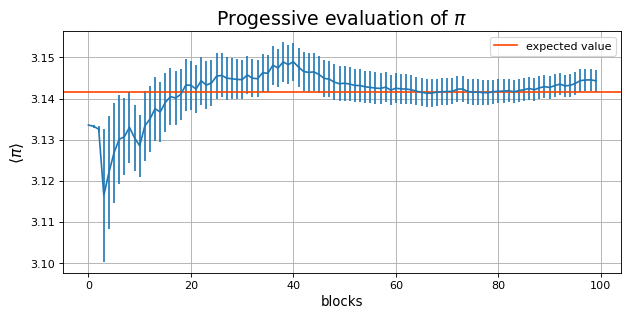

In [14]:
M=10**7
N=100

pi, erpi = np.loadtxt("Data3", unpack=True, usecols=(0,1), delimiter=",")
k = np.arange(N)

figure(figsize=(9,4), dpi=80)
plt.errorbar(k,pi,yerr=erpi)
plt.xlabel('blocks', fontsize = 12)
plt.ylabel(r'$\langle \pi \rangle $', fontsize = 14)
plt.title('Progessive evaluation of $\pi$', fontsize = 17)
plt.axhline(np.pi, color ="orangered", label = "expected value")
plt.legend()
plt.grid(True)
plt.show()

La figura rappresenta la media progressiva a blochhi del valore di $\pi$. La stima in ciascun blocco è stata ottenuta lanciando la sbarretta $10^5$ volte.

Nel codice non è stato usato un valore di $\pi$ noto a priori: la stima di $sin(\theta)$ (dove $\theta$ è l'angolo di inclinazione dell'ago rispetto all'orizzontale) è stata calcolata estraendo due numeri casuali distribuiti uniformemente $u \in [-1,1]$ e $v \in [0,-1]$ da cui si ricava $sin(\theta) = \frac{2uv}{u^2 + v^2}$.

Non è necessario utilizzare varie righe: ne basta utilizzare due (poste in 0 e 1) poichè il problema presenta invarianza traslazionale lungo l'asse delle y, ossia tutti i casi si possono ricondurre tramite una traslazione a questo modello. Non è stato neanche necessario estrarre la posizione in x della sbarretta poichè l'unico dato di interesse è l'intersezione con una riga orizzontale (invarianza traslazione anche lungo l'asse x).

Per lanciare un ago estraggo uniformemente la coordinata y di un estremo dell'intervallo [0,1), la coordinata y dell'altro estremo viene ricavata dal campionamento di $sin(\theta)$. Avendo il secondo estremo e la posizione delle due linee si può determinare se l'intersezione avviene verificando che il secondo estremo sia maggiore di 1 o inferiore di 0.